In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import os
from tqdm import tqdm

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(784, 64)  
        self.out = nn.Linear(64, 784)

    def forward(self, x):
        x = torch.relu(self.fc(x)) 
        x = self.out(x)  
        return x

model = SingleLayerNN()


criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)  


In [2]:
train_dataset = MNIST(os.getcwd(), train=True, download=True, transform=[transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
x_train = train_dataset.data / 255.0
x_train = torch.tensor(x_train, dtype=torch.float32)
x_train = x_train.view(-1, 784)
trainloader = DataLoader(x_train, batch_size=64, shuffle=True)

C:\Users\ianey\AppData\Local\Temp\ipykernel_13516\2340656213.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)


In [3]:
def neuronalNeuralBalance(inl, oul):

    ninc = torch.zeros_like(inl.weight)
    noul = torch.zeros_like(oul.weight)

    for i in range(inl.weight.data.shape[0]):
        inc = torch.sum(torch.abs(inl.weight.data[i])).item()
        outg = torch.sum(torch.abs(oul.weight.data[:,i])).item()

        # outg = outg / float(len(oul.weight.data[:,i]))
        # inc = inc / float(len(inl.weight.data[i]))

        opt = np.sqrt(outg/inc)

        ninc[i] = inl.weight.data[i]*opt
        noul[:, i] = oul.weight.data[:,i]/opt

    inl.weight.data = ninc
    oul.weight.data = noul



In [4]:
def neuralBalance(inl, oul, order=1):
    shape = inl.weight.shape[0]
    norm = []

    prev = torch.linalg.norm(inl.weight, dim=1, ord=order)
    out = torch.linalg.norm(oul.weight, dim = 0, ord=order)

    opt = torch.sqrt(out/prev)
    inl.weight.data = inl.weight*opt.unsqueeze(1)
    oul.weight.data = oul.weight/opt

In [5]:
model = model.to('cuda')
lay = []
for n, i in model.named_children():
    print(type(i).__name__)
    if type(i).__name__ == "Linear":
        lay.append((n, i))

num_epochs = 20  
for epoch in range(num_epochs):
    for b in tqdm(trainloader):
        b = b.to('cuda')
        optimizer.zero_grad() 
        outputs = model(b)  
        loss = criterion(outputs, b) 

        loss.backward() 
        optimizer.step() 
    
    
    for i in range(len(lay)):
        if i > 0 and i <= len(lay)-1:
            neuronalNeuralBalance(lay[i-1][1], lay[i][1])

    print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


Linear
Linear


100%|██████████| 938/938 [00:01<00:00, 504.97it/s]


Epoch 0/20, Loss: 0.03581535071134567


100%|██████████| 938/938 [00:01<00:00, 550.21it/s]


Epoch 1/20, Loss: 0.034290511161088943


100%|██████████| 938/938 [00:01<00:00, 559.97it/s]


Epoch 2/20, Loss: 0.03541084751486778


100%|██████████| 938/938 [00:01<00:00, 549.96it/s]


Epoch 3/20, Loss: 0.030261680483818054


100%|██████████| 938/938 [00:01<00:00, 539.76it/s]


Epoch 4/20, Loss: 0.03682806342840195


100%|██████████| 938/938 [00:01<00:00, 508.28it/s]


Epoch 5/20, Loss: 0.036620985716581345


100%|██████████| 938/938 [00:01<00:00, 517.17it/s]


Epoch 6/20, Loss: 0.0345781035721302


100%|██████████| 938/938 [00:01<00:00, 534.17it/s]


Epoch 7/20, Loss: 0.0346221886575222


100%|██████████| 938/938 [00:01<00:00, 537.35it/s]


Epoch 8/20, Loss: 0.03535061702132225


100%|██████████| 938/938 [00:01<00:00, 523.10it/s]


Epoch 9/20, Loss: 0.03418921306729317


100%|██████████| 938/938 [00:01<00:00, 560.05it/s]


Epoch 10/20, Loss: 0.03718928247690201


100%|██████████| 938/938 [00:01<00:00, 562.62it/s]


Epoch 11/20, Loss: 0.03412856534123421


100%|██████████| 938/938 [00:01<00:00, 560.46it/s]


Epoch 12/20, Loss: 0.034274227917194366


100%|██████████| 938/938 [00:01<00:00, 521.25it/s]


Epoch 13/20, Loss: 0.032590895891189575


100%|██████████| 938/938 [00:01<00:00, 514.99it/s]


Epoch 14/20, Loss: 0.03509156405925751


100%|██████████| 938/938 [00:01<00:00, 518.71it/s]


Epoch 15/20, Loss: 0.03348841890692711


100%|██████████| 938/938 [00:01<00:00, 535.40it/s]


Epoch 16/20, Loss: 0.03304920718073845


100%|██████████| 938/938 [00:01<00:00, 527.49it/s]


Epoch 17/20, Loss: 0.03423818200826645


100%|██████████| 938/938 [00:01<00:00, 528.78it/s]


Epoch 18/20, Loss: 0.03303283825516701


100%|██████████| 938/938 [00:01<00:00, 561.14it/s]


Epoch 19/20, Loss: 0.03613777831196785


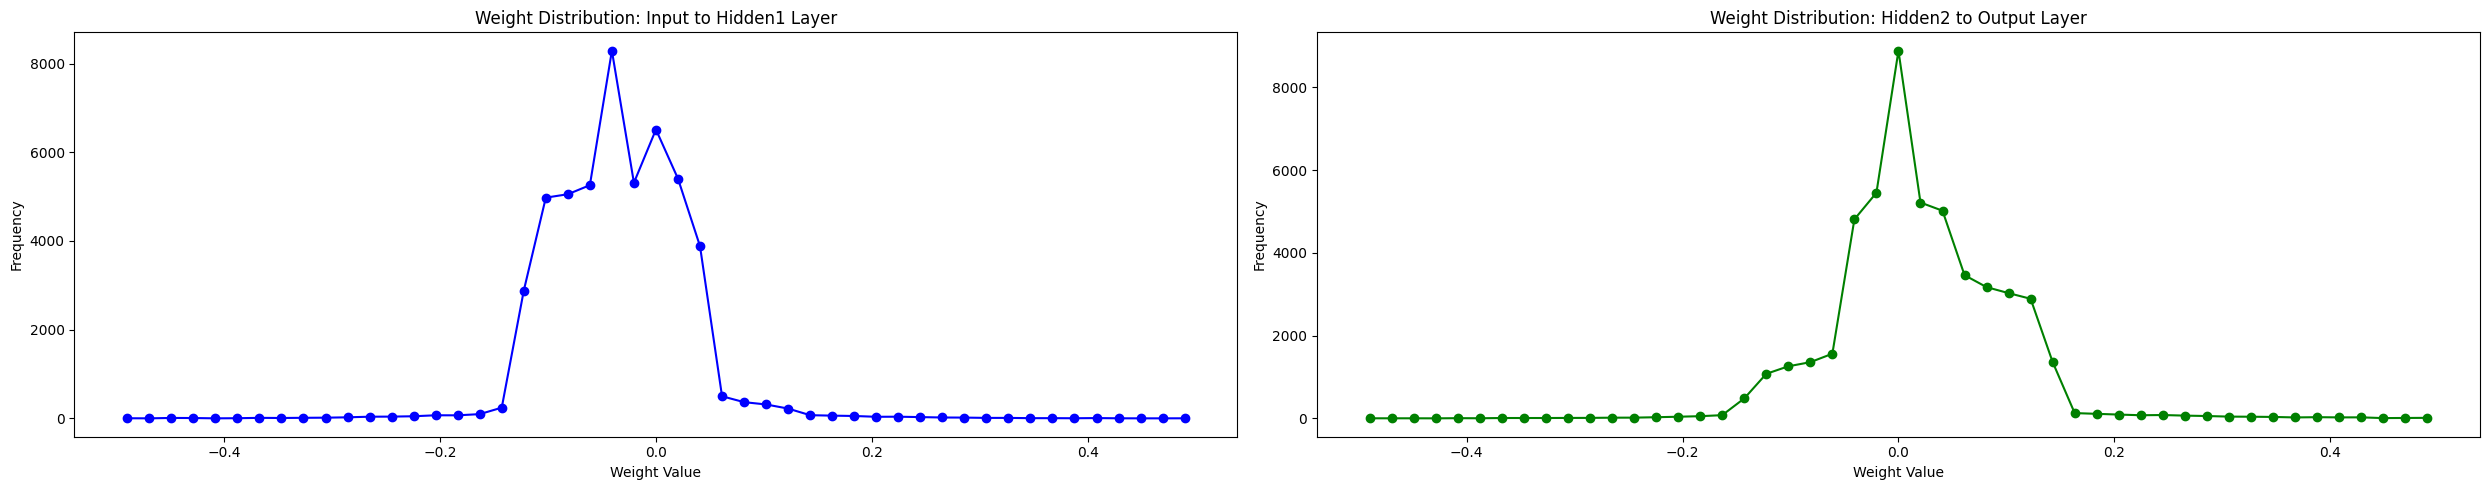

In [7]:
import matplotlib.pyplot as plt

fc_weights = model.fc.weight.cpu().detach().numpy().flatten()
out_weights = model.out.weight.cpu().detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50) 
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(out_bin_centers, out_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
import torch

def count_nonzero_weights_above_threshold(layer, threshold=0.1):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01 

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')

Number of non-zero weights greater than 0.01 in layer 1: 43791
Number of non-zero weights greater than 0.01 in layer 3: 41405
